# 내 연애는 얼마나 오래 갈까?
 by 숭코딩당당 (서정민, 김아원, 양채린, 이수민, 이아현, 이용택, 최진영)
 
 ---

   [질문지 링크](https://forms.gle/apcjFRh9kpr36MkeA)
---

# 문제 정의

연애에 영향을 미치는 데이터들을 기반으로 총 연애일을 예측해본다.

# 가설 수립

개인의 연애 성향 데이터를 이용해서 총 연애일을예측하는 것이 가능하다.

# 목표

데이터들간의 상관관계를 분석하고, 이 데이터들을 통해 총 연애일을 예측한다.  

---

# 데이터 set

1. sex (성별)
2. age (나이)
3. sib (형제 관계)
4. gra (학력)
5. trace (만난 경로)
6. meet_num (일주일에 만나는 횟수)
7. nickname (애인을 부르는 방법)
8. age2 (연상/연하/동갑)
9. date_fee (데이트 비용)
10. smoke (흡연 여부)
11. drinking (음주 빈도 수)
12. fav_date (선호하는 데이트)
13. blood (혈액형)
14. season (선호하는 계절)
15. home (자취 여부)
16. skin (스킨십 정도)
17. select (감성/이성)
18. day (실제 교제한 총 일 수)

# 요약

466개의 설문조사 DATA

---

# 분석 단계

# 1. 데이터 불러오기
# 2. Preprocessing
# 3. 시각화
# 4. 모델링 & 학습

---

# 1. 데이터 불러오기

In [1]:
# 라이브러리 임포트
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import ensemble
import numpy as np
import seaborn as sns
from sklearn.svm import SVR
%matplotlib inline

# 한글깨짐 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('연애.xlsx')
df

,본인의 성별을 선택해주세요.,연애 당시 본인의 나이는 몇 살이었나요?,본인의 형제자매 관계를 모두 선택해주세요. (복수선택 가능),당시 본인의 학력은 무엇이었나요?,상대방과 만나게 된 경로를 선택해주세요.,본인이 선호하는 애인과 만나는 횟수는 몇 회인가요? (일주일 기준),"연애 시, 본인이 선호하는 호칭은 무엇인가요? (복수선택 가능)",본인이 선호하는 상대방의 나이대는 어떤가요?,본인이 선호하는 데이트 비용 부담 비율은 무엇인가요? (본인 부담 기준),본인은 흡연을 하나요?,본인은 음주를 얼마나 자주 하시나요?,다음 중 자신이 선호하는 데이트는 무엇인가요?,본인의 혈액형은 무엇인가요?,본인이 연애를 하고 싶은 계절은 언제인가요?,"연애 당시, 본인 자취 여부는 어땠나요?",본인의 스킨십에 대한 가치관은 어떠한가요?,본인은 다음 중 어디에 더 가깝나요?,본인이 선택한 연애의 연애 기간을 작성해주세요. (일수로 작성해주세요! ex) 599 )
0,남,21,형,대학생(4년제),같은 학교/학원,2회,"이름, 여보/자기",연상 선호,7,X,한 달에 1회,맛집 탐방형,O,가을(9~11월),X,5,이성적 (연애를 해도 할 일은 해야한다는 타입),1900
1,남,17,여동생,고등학생,같은 학교/학원,2회,이름,연상 선호,4,O,한 달에 1회,맛집 탐방형,O,봄(3~5월),X,5,이성적 (연애를 해도 할 일은 해야한다는 타입),1685
2,여,20,언니,대학생(4년제),같은 학교/학원,2회,이름,연상 선호,4,X,일년에 1회 (거의 마시지 않음),맛집 탐방형,AB,가을(9~11월),X,4,이성적 (연애를 해도 할 일은 해야한다는 타입),1500
3,남,17,여동생,고등학생,같은 학교/학원,6회,이름,동갑 선호,5,O,일년에 1회 (거의 마시지 않음),집 요정형,B,봄(3~5월),X,5,감정적 (할 일이 있어도 당장 보고싶은 게 먼저인 타입),1460
4,남,27,누나,대학생(4년제),아르바이트,2회,이름,동갑 선호,7,X,일년에 1회 (거의 마시지 않음),핫플레이스형,A,봄(3~5월),X,3,이성적 (연애를 해도 할 일은 해야한다는 타입),1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,남,24,형,대학생(4년제),소개팅/미팅,6회,"야, 성 + 이름",동갑 선호,5,O,일주일에 3회 이상,음주가무형,AB,여름(6~8월),X,3,감정적 (할 일이 있어도 당장 보고싶은 게 먼저인 타입),17
461,남,23,"형, 남동생",휴학생,같은 학교/학원,2회,이름,동갑 선호,5,X,일주일에 1회,여행을 떠나요형,B,봄(3~5월),X,5,이성적 (연애를 해도 할 일은 해야한다는 타입),14
462,남,23,형,대학생(4년제),클럽,1회,이름,연하 선호,5,X,일주일에 1회,음주가무형,A,가을(9~11월),O,5,감정적 (할 일이 있어도 당장 보고싶은 게 먼저인 타입),8
463,남,28,형,직장인,소개팅/미팅,6회,"야, 성 + 이름",연하 선호,3,O,일주일에 3회 이상,음주가무형,AB,여름(6~8월),X,2,감정적 (할 일이 있어도 당장 보고싶은 게 먼저인 타입),8


# 2. Preprocessing

In [3]:
# 컬럼명 변경
df.columns = ["sex", "age","sib",'gra','trace','meet_num','nickname','age2','date_fee','smoke','drinking','fav_date','blood',
              'season','home','skin','select','day']
df

,sex,age,sib,gra,trace,meet_num,nickname,age2,date_fee,smoke,drinking,fav_date,blood,season,home,skin,select,day
0,남,21,형,대학생(4년제),같은 학교/학원,2회,"이름, 여보/자기",연상 선호,7,X,한 달에 1회,맛집 탐방형,O,가을(9~11월),X,5,이성적 (연애를 해도 할 일은 해야한다는 타입),1900
1,남,17,여동생,고등학생,같은 학교/학원,2회,이름,연상 선호,4,O,한 달에 1회,맛집 탐방형,O,봄(3~5월),X,5,이성적 (연애를 해도 할 일은 해야한다는 타입),1685
2,여,20,언니,대학생(4년제),같은 학교/학원,2회,이름,연상 선호,4,X,일년에 1회 (거의 마시지 않음),맛집 탐방형,AB,가을(9~11월),X,4,이성적 (연애를 해도 할 일은 해야한다는 타입),1500
3,남,17,여동생,고등학생,같은 학교/학원,6회,이름,동갑 선호,5,O,일년에 1회 (거의 마시지 않음),집 요정형,B,봄(3~5월),X,5,감정적 (할 일이 있어도 당장 보고싶은 게 먼저인 타입),1460
4,남,27,누나,대학생(4년제),아르바이트,2회,이름,동갑 선호,7,X,일년에 1회 (거의 마시지 않음),핫플레이스형,A,봄(3~5월),X,3,이성적 (연애를 해도 할 일은 해야한다는 타입),1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,남,24,형,대학생(4년제),소개팅/미팅,6회,"야, 성 + 이름",동갑 선호,5,O,일주일에 3회 이상,음주가무형,AB,여름(6~8월),X,3,감정적 (할 일이 있어도 당장 보고싶은 게 먼저인 타입),17
461,남,23,"형, 남동생",휴학생,같은 학교/학원,2회,이름,동갑 선호,5,X,일주일에 1회,여행을 떠나요형,B,봄(3~5월),X,5,이성적 (연애를 해도 할 일은 해야한다는 타입),14
462,남,23,형,대학생(4년제),클럽,1회,이름,연하 선호,5,X,일주일에 1회,음주가무형,A,가을(9~11월),O,5,감정적 (할 일이 있어도 당장 보고싶은 게 먼저인 타입),8
463,남,28,형,직장인,소개팅/미팅,6회,"야, 성 + 이름",연하 선호,3,O,일주일에 3회 이상,음주가무형,AB,여름(6~8월),X,2,감정적 (할 일이 있어도 당장 보고싶은 게 먼저인 타입),8


In [4]:
# 라벨링
#sex
df.loc[df['sex']=='남','sex']=0
df.loc[df['sex']=='여','sex']=1
#sib
df.loc[df['sib']=='외동','sib']=0
df.loc[df['sib']=='누나','sib']=3
df.loc[df['sib']=='형','sib']=2
df.loc[df['sib']=='언니','sib']=3
df.loc[df['sib']=='오빠','sib']=2
df.loc[df['sib']=='여동생','sib']=3
df.loc[df['sib']=='남동생','sib']=2
#gra
df.loc[df['gra']=='고등학생','gra']=1
df.loc[df['gra']=='대학생(4년제)','gra']=2
df.loc[df['gra']=='대학생(4년이하)','gra']=3
df.loc[df['gra']=='휴학생','gra']=4
df.loc[df['gra']=='직장인','gra']=5
#trace
df.loc[df['trace']=='같은 학교/학원','trace']=1
df.loc[df['trace']=='아르바이트','trace']=2
df.loc[df['trace']=='번호따임','trace']=3
df.loc[df['trace']=='소개팅/미팅','trace']=4
df.loc[df['trace']=='종교활동','trace']=5
df.loc[df['trace']=='교외 동아리','trace']=6
#meet_num
df.loc[df['meet_num']=='1회','meet_num'] = 1
df.loc[df['meet_num']=='2회','meet_num'] = 1
df.loc[df['meet_num']=='3회','meet_num'] = 2
df.loc[df['meet_num']=='4회','meet_num'] = 2
df.loc[df['meet_num']=='5회','meet_num'] = 3
df.loc[df['meet_num']=='6회','meet_num'] = 3
df.loc[df['meet_num']=='7회','meet_num'] = 3

#nickname
#age2
df.loc[df['age2']=='연상 선호','age2']=1
df.loc[df['age2']=='동갑 선호','age2']=2
df.loc[df['age2']=='연하 선호','age2']=3
#date_fee
#smoke
df.loc[df['smoke']=='X','smoke'] = 0
df.loc[df['smoke']=='O','smoke'] = 1
#drinking
df.loc[df['drinking']=='일주일에 3회 이상','drinking']=1
df.loc[df['drinking']=='일주일에 1회','drinking']=2
df.loc[df['drinking']=='한 달에 1회','drinking']=3
df.loc[df['drinking']=='일년에 1회 (거의 마시지 않음)','drinking']=4
df.loc[df['drinking']=='x','drinking']=4

#fav_date
df.loc[df['fav_date']=='맛집 탐방형','fav_date']=1
df.loc[df['fav_date']=='집 요정형','fav_date']=2
df.loc[df['fav_date']=='음주가무형','fav_date']=3
df.loc[df['fav_date']=='여행을 떠나요형','fav_date']=4
df.loc[df['fav_date']=='핫플레이스형','fav_date']=5
df.loc[df['fav_date']=='피방ㄱ?형','fav_date']=6
#blood
blood_mapping = {'O':1,
                 'A':2,
                 'B':3,
                 'AB':4}

df.blood = df.blood.map(blood_mapping)
#season
df.loc[df['season']=='봄(3~5월)','season'] = 1
df.loc[df['season']=='여름(6~8월)','season'] = 2
df.loc[df['season']=='가을(9~11월)','season'] = 3
df.loc[df['season']=='겨울(12~2월)','season'] = 4
#home
df.loc[df['home']=='O','home']=1
df.loc[df['home']=='X','home']=2
#skin
df.loc[df['skin']==0,'skin']=0
df.loc[df['skin']==1,'skin']=0
df.loc[df['skin']==2,'skin']=0
df.loc[df['skin']==3,'skin']=1
df.loc[df['skin']==4,'skin']=1
df.loc[df['skin']==5,'skin']=1
#select
df.loc[df['select']=='이성적 (연애를 해도 할 일은 해야한다는 타입)','select']=1
df.loc[df['select']=='감정적 (할 일이 있어도 당장 보고싶은 게 먼저인 타입)','select']=2
df.head()

,sex,age,sib,gra,trace,meet_num,nickname,age2,date_fee,smoke,drinking,fav_date,blood,season,home,skin,select,day
0,0,21,2,2,1,1,"이름, 여보/자기",1,7,0,3,1,1,3,2,1,1,1900
1,0,17,3,1,1,1,이름,1,4,1,3,1,1,1,2,1,1,1685
2,1,20,3,2,1,1,이름,1,4,0,4,1,4,3,2,1,1,1500
3,0,17,3,1,1,3,이름,2,5,1,4,2,3,1,2,1,2,1460
4,0,27,3,2,2,1,이름,2,7,0,4,5,2,1,2,1,1,1400


In [5]:
# nickname 가짓수 컬럼 추가
df['nick_cnt'] = df['nickname'].apply(lambda e: e.count(',')+1)

In [6]:
# nickname 라벨링
df['nickname'][df['nickname'].str.contains('야')==True] = 1
df['nickname'][df['nickname'].str.contains('성 + 이름')==True] = 1
df['nickname'][df['nickname'].str.contains('여보/자기')==True] = 2
df['nickname'][df['nickname'].str.contains('둘만의 애칭')==True] = 2
df['nickname'][df['nickname'].str.contains('이름')==True] = 3
df['nickname'][df['nickname'].str.contains('누나/오빠/언니/형')==True] = 3

# trace 기타 : 7 라벨링
df['trace'] = df['trace'].apply(lambda x : x if(str(x).isdigit() ) else 7)


In [7]:
df.loc[df['sib']=='여동생, 남동생','sib']=1
df.loc[df['sib']=='언니, 남동생','sib']=1
df.loc[df['sib']=='누나, 형','sib']=1
df.loc[df['sib']=='누나, 여동생','sib']=3
df.loc[df['sib']=='언니, 여동생','sib']=3
df.loc[df['sib']=='형, 남동생','sib']=2
df.loc[df['sib']=='오빠, 남동생','sib']=2
df.loc[df['sib']=='오빠, 여동생','sib']=1
df.loc[df['sib']=='언니, 오빠','sib']=1
df.loc[df['sib']=='누나, 남동생','sib']=1
df.loc[df['sib']=='형, 여동생','sib']=1
df.loc[df['sib']=='언니, 오빠, 남동생','sib']=1

df['sib'].value_counts()

3    211
2    186
0     38
1     30
Name: sib, dtype: int64

In [8]:
df['sib_2'] = 0

df.loc[df['sib']== 1,'sib_2'] = 1

# 남자인데 남자형제만 있는 경우
df.loc[(df.sex == 0)& (df.sib == 2),'sib_2'] = 2

# 여자인데 여자형제만 있는 경우
df.loc[(df.sex == 1)& (df.sib == 3),'sib_2'] = 3

# 남자인데 여자형제만 or 여자인데 남자형제만 있는 경우
df.loc[(df.sex == 0)& (df.sib == 3),'sib_2'] = 4
df.loc[(df.sex == 1)& (df.sib == 2),'sib_2'] = 4

df['sib_2'].value_counts()

4    211
3     98
2     88
0     38
1     30
Name: sib_2, dtype: int64

In [9]:
df.describe()

,sex,age,sib,gra,trace,meet_num,age2,date_fee,smoke,drinking,fav_date,blood,season,home,skin,select,day,nick_cnt,sib_2
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000
mean,0.509677,21.965591,2.225806,2.204301,2.397849,2.081720,1.782796,5.154839,0.275269,2.440860,2.769892,2.350538,2.025806,1.729032,0.862366,1.367742,342.787097,1.666667,2.890323
std,0.500445,2.373275,0.892123,0.852976,1.741604,0.714527,0.781056,1.278850,0.447131,1.036639,1.745918,1.054406,1.175990,0.444938,0.344887,0.482710,288.354592,0.847579,1.275943
min,0.000000,16.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,0.000000
25%,0.000000,20.000000,2.000000,2.000000,1.000000,2.000000,1.000000,5.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,1.000000,2.000000
50%,1.000000,22.000000,2.000000,2.000000,1.000000,2.000000,2.000000,5.000000,0.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,300.000000,1.000000,3.000000
75%,1.000000,24.000000,3.000000,2.000000,4.000000,3.000000,2.000000,6.000000,1.000000,3.000000,4.000000,3.000000,3.000000,2.000000,1.000000,2.000000,501.000000,2.000000,4.000000
max,1.000000,28.000000,3.000000,5.000000,7.000000,3.000000,3.000000,10.000000,1.000000,4.000000,6.000000,4.000000,4.000000,2.000000,1.000000,2.000000,1900.000000,5.000000,4.000000


# 3. 시각화

In [10]:
df['day'].value_counts()

400    13
100     9
500     9
200     9
600     8
       ..
784     1
77      1
270     1
772     1
734     1
Name: day, Length: 269, dtype: int64

In [11]:
df['categorized_day'] = df['day']
df.loc[df['categorized_day']< 100,'categorized_day'] = 0
df.loc[(df['categorized_day'] >=100 )& (df['categorized_day']<365),'categorized_day']=1
# df.loc[(df['day'] >=200 )& (df['day']<300),"day"]=250
# df.loc[(df['day'] >=300 )& (df['day']<400),'day']=350
# df.loc[(df['day'] >=400 )& (df['day']<500),'day']=450
df.loc[df['categorized_day']>=365,'categorized_day'] = 2
male_count = int(df.loc[df['sex']==0, 'sex'].count())
female_count = int(df.loc[df['sex']==1, 'sex'].count())

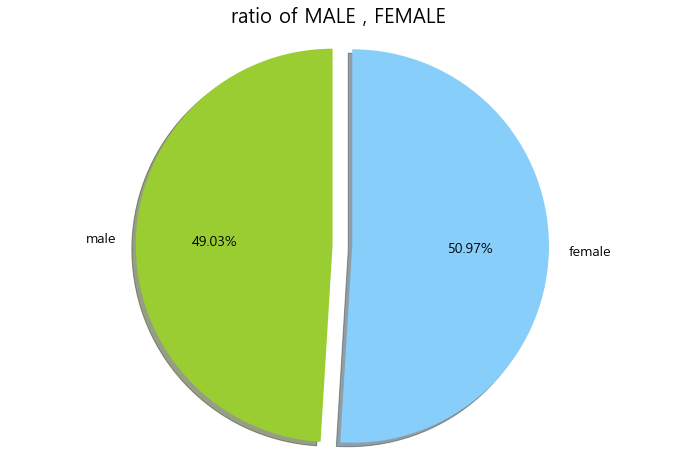

In [12]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]

group_names = ['male', 'female']

group_sizes = [male_count, female_count]

group_colors = ['yellowgreen', 'lightskyblue',]

group_explodes = (0.1, 0) # explode 1st slice



# Pie chart

plt.pie(group_sizes, 

        explode=group_explodes, 

        labels=group_names, 

        colors=group_colors, 

        autopct='%1.2f%%', # second decimal place

        shadow=True, 

        startangle=90,

        textprops={'fontsize': 14}) # text font size

plt.axis('equal') #  equal length of X and Y axis

plt.title('ratio of MALE , FEMALE ', fontsize=20)

plt.show()


In [13]:
zero_count = int(df.loc[df['categorized_day']==0, 'categorized_day'].count())
one_count = int(df.loc[df['categorized_day']==1, 'categorized_day'].count())
two_count = int(df.loc[df['categorized_day']==2, 'categorized_day'].count())

# trace0_1 = int(df.loc[(df['trace']==1) & (df['categorized_day']==0), 'trace'].count())
# trace0_2 = int(df.loc[(df['trace']==2) & (df['categorized_day']==0), 'trace'].count())
# trace0_3 = int(df.loc[(df['trace']==3) & (df['categorized_day']==0), 'trace'].count())
# trace0_4 = int(df.loc[(df['trace']==4) & (df['categorized_day']==0), 'trace'].count())
# trace0_5 = int(df.loc[(df['trace']==5) & (df['categorized_day']==0), 'trace'].count())
# trace0_6 = int(df.loc[(df['trace']==6) & (df['categorized_day']==0), 'trace'].count())

trace1_1 = int(df.loc[(df['trace']==1) & (df['categorized_day']==1), 'trace'].count())
trace1_2 = int(df.loc[(df['trace']==2) & (df['categorized_day']==1), 'trace'].count())
trace1_3 = int(df.loc[(df['trace']==3) & (df['categorized_day']==1), 'trace'].count())
trace1_4 = int(df.loc[(df['trace']==4) & (df['categorized_day']==1), 'trace'].count())
trace1_5 = int(df.loc[(df['trace']==5) & (df['categorized_day']==1), 'trace'].count())
trace1_6 = int(df.loc[(df['trace']==6) & (df['categorized_day']==1), 'trace'].count())

trace2_1 = int(df.loc[(df['trace']==1) & (df['categorized_day']==2), 'trace'].count())
trace2_2 = int(df.loc[(df['trace']==2) & (df['categorized_day']==2), 'trace'].count())
trace2_3 = int(df.loc[(df['trace']==3) & (df['categorized_day']==2), 'trace'].count())
trace2_4 = int(df.loc[(df['trace']==4) & (df['categorized_day']==2), 'trace'].count())
trace2_5 = int(df.loc[(df['trace']==5) & (df['categorized_day']==2), 'trace'].count())
trace2_6 = int(df.loc[(df['trace']==6) & (df['categorized_day']==2), 'trace'].count())

drink0_1 = int(df.loc[(df['drinking']==1) & (df['categorized_day']==0), 'trace'].count())
drink0_2 = int(df.loc[(df['drinking']==2) & (df['categorized_day']==0), 'trace'].count())
drink0_3 = int(df.loc[(df['drinking']==3) & (df['categorized_day']==0), 'trace'].count())
drink0_4 = int(df.loc[(df['drinking']==4) & (df['categorized_day']==0), 'trace'].count())

drink1_1 = int(df.loc[(df['drinking']==1) & (df['categorized_day']==1), 'trace'].count())
drink1_2 = int(df.loc[(df['drinking']==2) & (df['categorized_day']==1), 'trace'].count())
drink1_3 = int(df.loc[(df['drinking']==3) & (df['categorized_day']==1), 'trace'].count())
drink1_4 = int(df.loc[(df['drinking']==4) & (df['categorized_day']==1), 'trace'].count())

drink2_1 = int(df.loc[(df['drinking']==1) & (df['categorized_day']==2), 'trace'].count())
drink2_2 = int(df.loc[(df['drinking']==2) & (df['categorized_day']==2), 'trace'].count())
drink2_3 = int(df.loc[(df['drinking']==3) & (df['categorized_day']==2), 'trace'].count())
drink2_4 = int(df.loc[(df['drinking']==4) & (df['categorized_day']==2), 'trace'].count())

#sib_2
sib0_0 = int(df.loc[(df['sib_2']==0) & (df['categorized_day']==0), 'trace'].count())
sib0_1 = int(df.loc[(df['sib_2']==1) & (df['categorized_day']==0), 'trace'].count())
sib0_2 = int(df.loc[(df['sib_2']==2) & (df['categorized_day']==0), 'trace'].count())
sib0_3 = int(df.loc[(df['sib_2']==3) & (df['categorized_day']==0), 'trace'].count())
sib0_4 = int(df.loc[(df['sib_2']==4) & (df['categorized_day']==0), 'trace'].count())

sib1_0 = int(df.loc[(df['sib_2']==0) & (df['categorized_day']==1), 'trace'].count())
sib1_1 = int(df.loc[(df['sib_2']==1) & (df['categorized_day']==1), 'trace'].count())
sib1_2 = int(df.loc[(df['sib_2']==2) & (df['categorized_day']==1), 'trace'].count())
sib1_3 = int(df.loc[(df['sib_2']==3) & (df['categorized_day']==1), 'trace'].count())
sib1_4 = int(df.loc[(df['sib_2']==4) & (df['categorized_day']==1), 'trace'].count())

sib2_0 = int(df.loc[(df['sib_2']==0) & (df['categorized_day']==2), 'trace'].count())
sib2_1 = int(df.loc[(df['sib_2']==1) & (df['categorized_day']==2), 'trace'].count())
sib2_2 = int(df.loc[(df['sib_2']==2) & (df['categorized_day']==2), 'trace'].count())
sib2_3 = int(df.loc[(df['sib_2']==3) & (df['categorized_day']==2), 'trace'].count())
sib2_4 = int(df.loc[(df['sib_2']==4) & (df['categorized_day']==2), 'trace'].count())

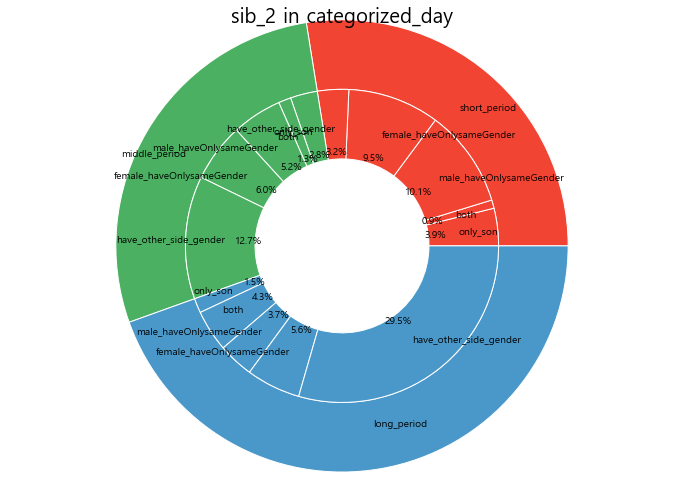

In [14]:
# importing library and set figure size

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
 # info. of groups

group_names = ['short_period', 'middle_period', 'long_period']

group_sizes = [zero_count, one_count, two_count]



# info. of subgroups

subgroup_names = ['only_son','both','male_haveOnlysameGender','female_haveOnlysameGender','have_other_side_gender','only_son','both','male_haveOnlysameGender','female_haveOnlysameGender','have_other_side_gender','only_son','both','male_haveOnlysameGender','female_haveOnlysameGender','have_other_side_gender']

subgroup_sizes = [sib0_0,sib0_1,sib0_2,sib0_3,sib0_4,sib1_0,sib1_1,sib1_2,sib1_3,sib1_4,sib2_0,sib2_1,sib2_2,sib2_3,sib2_4]



# colors

a, b, c = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]



# width

width_num = 0.4

# Outside Ring

fig, ax = plt.subplots()

ax.axis('equal')
pie_outside, _ = ax.pie(group_sizes, radius=1.3, labels=group_names, labeldistance=0.8,colors=[a(0.6), b(0.6), c(0.6)])

plt.setp(pie_outside, width=width_num, edgecolor='white')



# Inside Ring
pie_inside, plt_labels, junk =  ax.pie(subgroup_sizes, radius=(1.3 - width_num), labels=subgroup_names, labeldistance=0.75, autopct='%1.1f%%', colors=[a(0.6), a(0.6), a(0.6), a(0.6), a(0.6), b(0.6), b(0.6), b(0.6),b(0.6),b(0.6), c(0.6), c(0.6), c(0.6), c(0.6), c(0.6)])

plt.setp(pie_inside, width=width_num, edgecolor='white')

plt.title('sib_2 in categorized_day', fontsize=20)
plt.show()

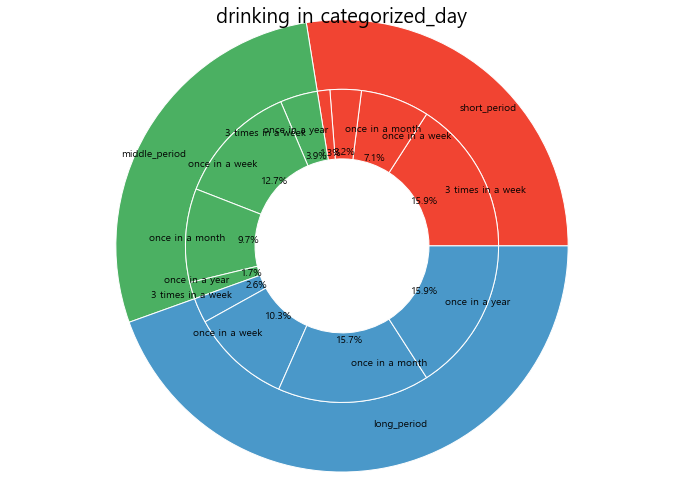

In [15]:
# importing library and set figure size

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
 # info. of groups

group_names = ['short_period', 'middle_period', 'long_period']

group_sizes = [zero_count, one_count, two_count]



# info. of subgroups

subgroup_names = ['3 times in a week ','once in a week','once in a month','once in a year','3 times in a week ','once in a week','once in a month','once in a year','3 times in a week ','once in a week','once in a month','once in a year']

subgroup_sizes = [drink0_1,drink0_2,drink0_3,drink0_4,drink1_1,drink1_2,drink1_3,drink1_4,drink2_1,drink2_2,drink2_3,drink2_4]



# colors

a, b, c = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]



# width

width_num = 0.4

# Outside Ring

fig, ax = plt.subplots()

ax.axis('equal')
pie_outside, _ = ax.pie(group_sizes, radius=1.3, labels=group_names, labeldistance=0.8,colors=[a(0.6), b(0.6), c(0.6)])

plt.setp(pie_outside, width=width_num, edgecolor='white')



# Inside Ring
pie_inside, plt_labels, junk =  ax.pie(subgroup_sizes, radius=(1.3 - width_num), labels=subgroup_names, labeldistance=0.75, autopct='%1.1f%%', colors=[a(0.6), a(0.6), a(0.6), a(0.6), b(0.6), b(0.6), b(0.6),b(0.6), c(0.6), c(0.6), c(0.6), c(0.6)])

plt.setp(pie_inside, width=width_num, edgecolor='white')

plt.title('drinking in categorized_day', fontsize=20)
plt.show()

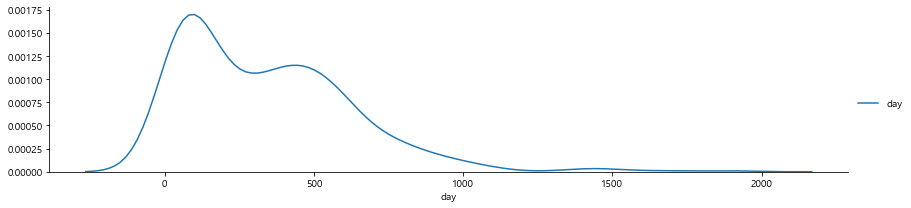

In [16]:
facet = sns.FacetGrid(df, aspect=4)
facet.map(sns.kdeplot, 'day')
facet.add_legend()
plt.show()

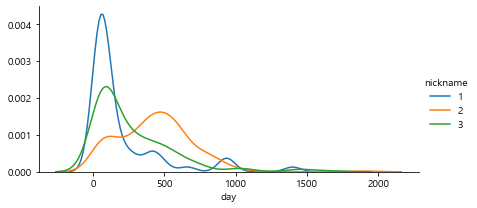

In [17]:
# 일 수 - 애칭
facet = sns.FacetGrid(df,hue='nickname',aspect=2)
facet.map(sns.kdeplot,'day')
facet.add_legend()

plt.show()

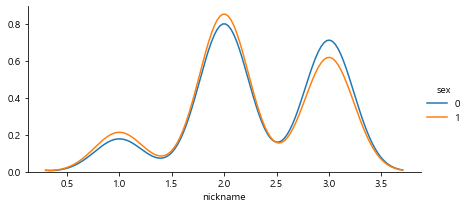

In [18]:
# sex - 애칭
facet = sns.FacetGrid(df,hue='sex',aspect=2)
facet.map(sns.kdeplot,'nickname')
facet.add_legend()

plt.show()

In [19]:
df3 = df.copy()

df22=df3
df22.loc[df22['day']< 100,'day'] = 50
df22.loc[(df22['day'] >=100 )& (df22['day']<365),'day'] = 300
df22.loc[df22['day']>=365,'day'] = 500
df22.loc[df22['day']==50,'day'] = 'short'

df22.loc[df22['day']==300,'day'] = 'mid'

df22.loc[df22['day']==500,'day'] = 'long'
df22['day'].value_counts()

long     207
mid      130
short    128
Name: day, dtype: int64

In [20]:
df22.loc[df22['trace']==1,'trace'] = 'CC'
df22.loc[df22['trace']==2,'trace'] = 'working'
df22.loc[df22['trace']==3,'trace'] = 'hunting'
df22.loc[df22['trace']==4,'trace'] = 'meeting'
df22.loc[df22['trace']==5,'trace'] = 'religion'
df22.loc[df22['trace']==6,'trace'] = 'crew'
df22.loc[df22['trace']==7,'trace'] = 'etc'

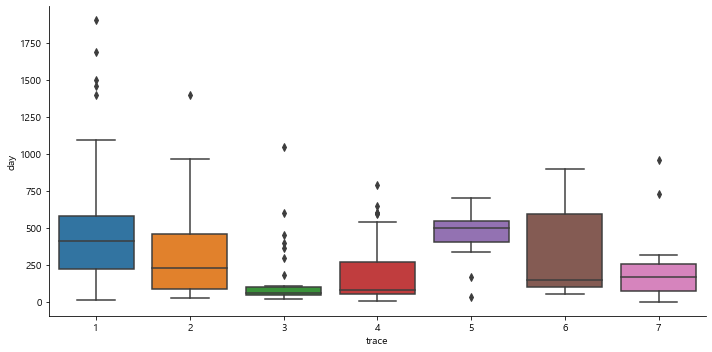

In [21]:
sns.catplot(kind='box',data=df,x='trace',y='day',aspect=2)
plt.show()

In [22]:
df22.loc[df22['trace']=='같은 학교/학원','trace']=1
df22.loc[df22['trace']=='아르바이트','trace']=2
df22.loc[df22['trace']=='번호따임','trace']=3
df22.loc[df22['trace']=='소개팅/미팅','trace']=4
df22.loc[df22['trace']=='종교활동','trace']=5
df22.loc[df22['trace']=='교외 동아리','trace']=6

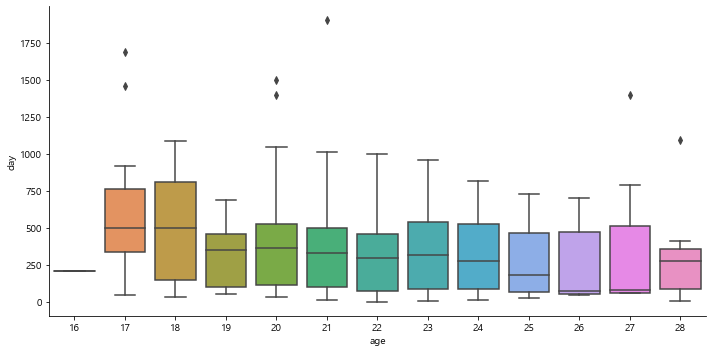

In [23]:
sns.catplot(kind='box',data=df,x='age',y='day',aspect=2)
plt.show()

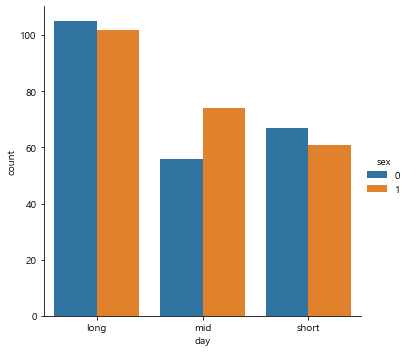

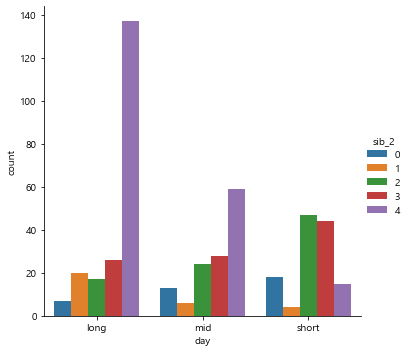

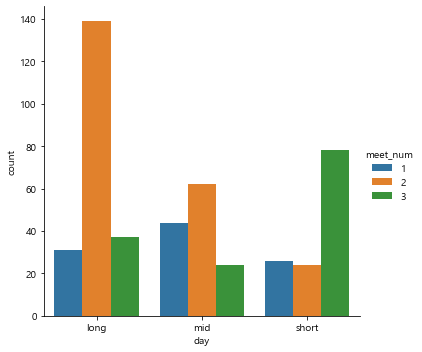

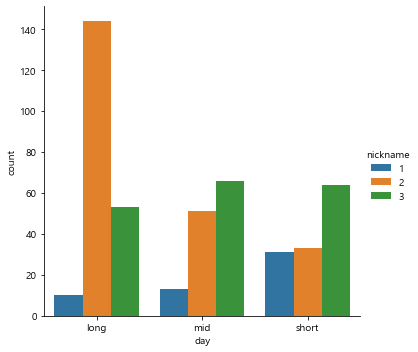

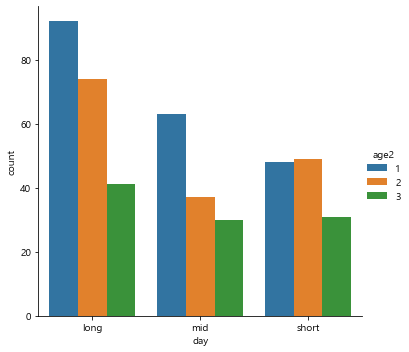

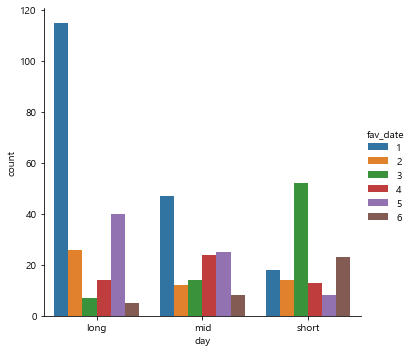

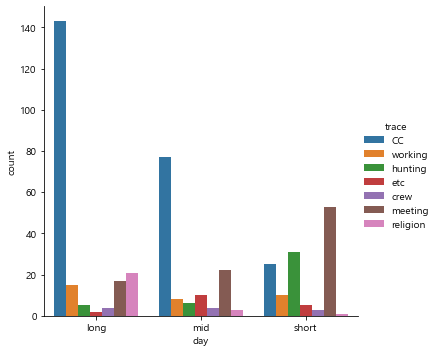

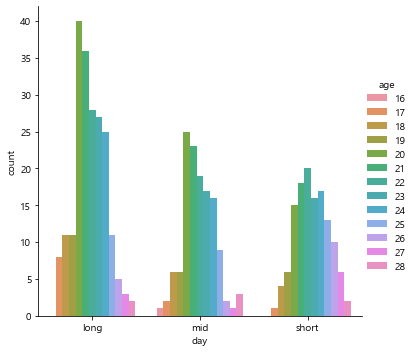

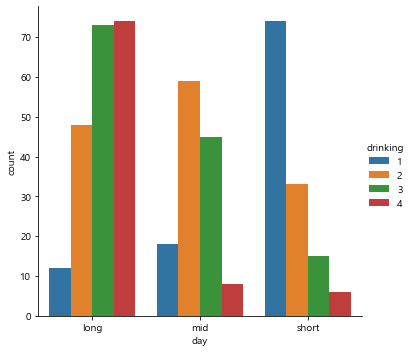

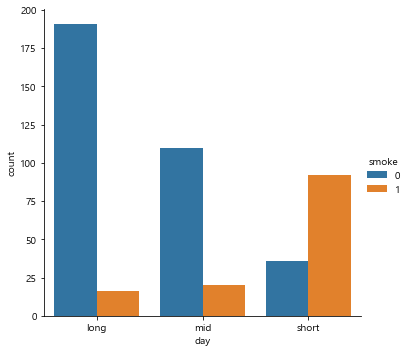

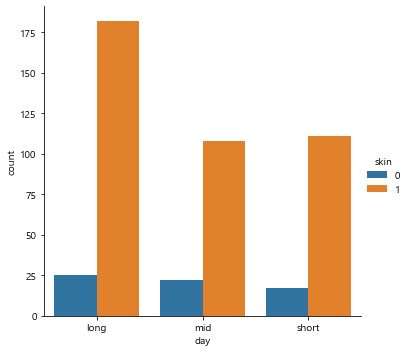

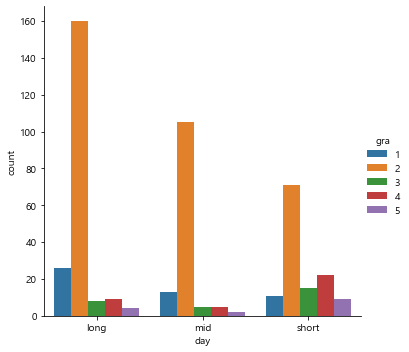

In [24]:
sns.catplot(data=df22, x="day", kind="count", hue="sex")
plt.show()
sns.catplot(data=df22, x="day", kind="count", hue="sib_2")
plt.show()
sns.catplot(data=df22, x="day", kind="count", hue="meet_num")
plt.show()
sns.catplot(data=df22, x="day", kind="count", hue="nickname")
plt.show()
sns.catplot(data=df22, x="day", kind="count", hue="age2")
plt.show()
sns.catplot(data=df22, x="day", kind="count", hue="fav_date")
plt.show()
sns.catplot(data=df22, x="day", kind="count", hue="trace")
plt.show()
sns.catplot(data=df22, x="day", kind="count", hue="age")
plt.show()
sns.catplot(data=df22, x="day", kind="count", hue="drinking")
plt.show()
sns.catplot(data=df22, x="day", kind="count", hue="smoke")
plt.show()
sns.catplot(data=df22, x="day", kind="count", hue="skin")
plt.show()
sns.catplot(data=df22, x="day", kind="count", hue="gra")
plt.show()

In [25]:
# 종속변수와의 상관계수 절댓값이 0.15 이하인 변수 삭제 (df2)
df2 =df.drop(['age','sex', 'sib', 'meet_num', 'age2', 'date_fee', 'blood', 'season', 'skin'],axis=1)
# 위에 카테고리 추가한것도 추가 drop
df2 = df.drop(['categorized_day'],axis=1)

In [26]:
df2.corr()

,sex,age,sib,gra,trace,meet_num,age2,date_fee,smoke,drinking,fav_date,blood,season,home,skin,select,day,nick_cnt,sib_2
sex,1.000000,-0.182992,-0.079728,-0.012215,-0.030391,-0.038379,-0.449492,-0.470428,-0.166034,0.027070,-0.028279,0.105876,0.036195,0.050518,-0.129620,-0.010303,-0.058986,0.111781,0.074232
age,-0.182992,1.000000,0.001642,0.534729,0.226485,0.056311,0.161057,0.069928,0.199854,-0.147998,0.035534,0.003969,0.065956,-0.272132,0.065294,0.091963,-0.155514,-0.107498,-0.110140
sib,-0.079728,0.001642,1.000000,0.035539,-0.100945,0.055513,-0.012970,-0.036379,-0.042700,0.085548,-0.086948,0.034810,-0.147310,0.013311,-0.017850,-0.128183,0.123081,-0.054154,0.781028
gra,-0.012215,0.534729,0.035539,1.000000,0.230967,0.082167,-0.010887,-0.003378,0.270388,-0.226385,0.092417,0.099922,0.022664,-0.239969,0.073812,0.194007,-0.182955,-0.060614,-0.066497
trace,-0.030391,0.226485,-0.100945,0.230967,1.000000,-0.012328,0.054157,-0.003527,0.246522,-0.190470,0.192482,0.126927,0.027597,-0.219356,0.080596,0.135787,-0.273043,-0.128966,-0.204355
meet_num,-0.038379,0.056311,0.055513,0.082167,-0.012328,1.000000,0.047321,0.021501,0.381402,-0.147671,0.127399,0.062016,-0.012775,-0.167462,0.106959,0.343830,-0.135112,0.048635,-0.058701
age2,-0.449492,0.161057,-0.012970,-0.010887,0.054157,0.047321,1.000000,0.292661,0.091346,-0.033201,0.084963,0.050780,0.022540,-0.033288,0.048795,0.006528,-0.046913,-0.145413,-0.080182
date_fee,-0.470428,0.069928,-0.036379,-0.003378,-0.003527,0.021501,0.292661,1.000000,-0.006857,0.011799,-0.012000,-0.056322,0.020266,-0.032158,0.141263,0.005316,0.081525,-0.067602,-0.066175
smoke,-0.166034,0.199854,-0.042700,0.270388,0.246522,0.381402,0.091346,-0.006857,1.000000,-0.494863,0.235915,0.169738,0.113520,-0.350080,0.106455,0.498557,-0.369543,-0.166812,-0.245398
drinking,0.027070,-0.147998,0.085548,-0.226385,-0.190470,-0.147671,-0.033201,0.011799,-0.494863,1.000000,-0.226043,-0.096339,-0.064157,0.250208,-0.046928,-0.397905,0.459375,0.246104,0.308742


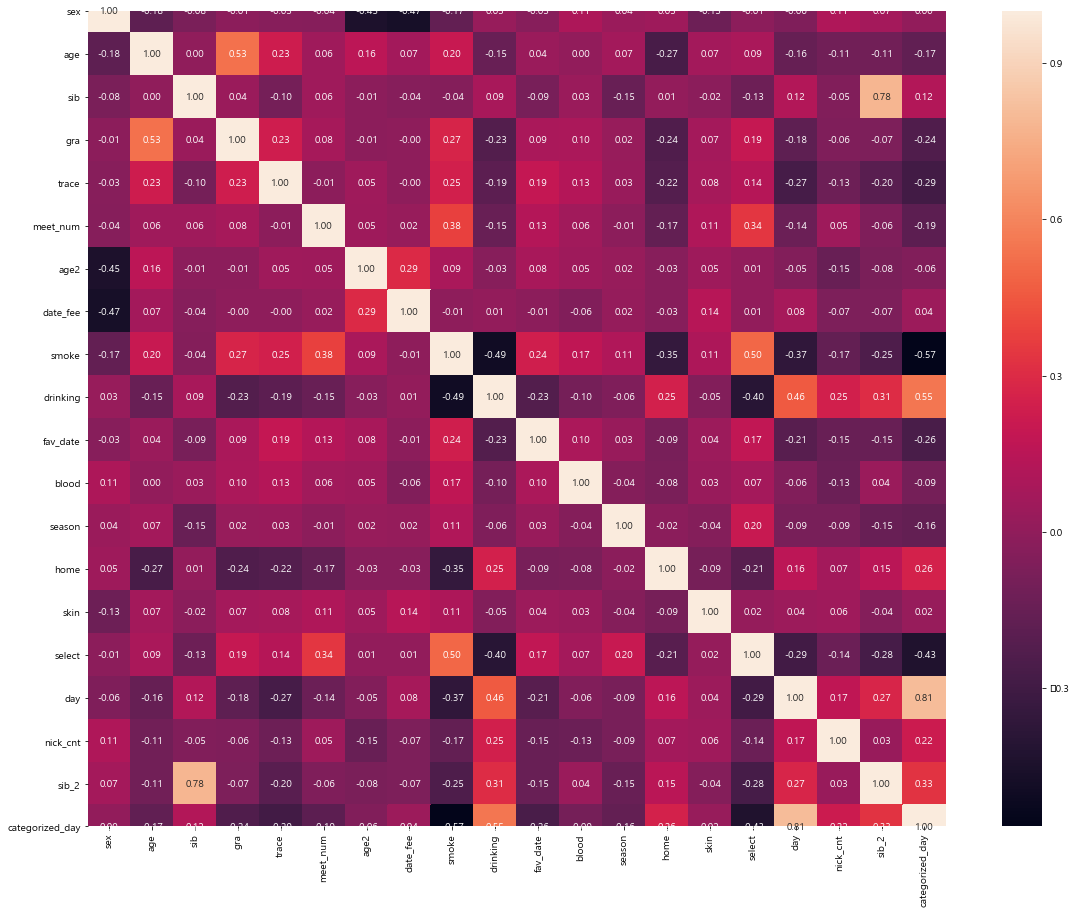

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap (df.corr(),annot=True, fmt='.2f',square=True)

In [28]:
df2.corr()

,sex,age,sib,gra,trace,meet_num,age2,date_fee,smoke,drinking,fav_date,blood,season,home,skin,select,day,nick_cnt,sib_2
sex,1.000000,-0.182992,-0.079728,-0.012215,-0.030391,-0.038379,-0.449492,-0.470428,-0.166034,0.027070,-0.028279,0.105876,0.036195,0.050518,-0.129620,-0.010303,-0.058986,0.111781,0.074232
age,-0.182992,1.000000,0.001642,0.534729,0.226485,0.056311,0.161057,0.069928,0.199854,-0.147998,0.035534,0.003969,0.065956,-0.272132,0.065294,0.091963,-0.155514,-0.107498,-0.110140
sib,-0.079728,0.001642,1.000000,0.035539,-0.100945,0.055513,-0.012970,-0.036379,-0.042700,0.085548,-0.086948,0.034810,-0.147310,0.013311,-0.017850,-0.128183,0.123081,-0.054154,0.781028
gra,-0.012215,0.534729,0.035539,1.000000,0.230967,0.082167,-0.010887,-0.003378,0.270388,-0.226385,0.092417,0.099922,0.022664,-0.239969,0.073812,0.194007,-0.182955,-0.060614,-0.066497
trace,-0.030391,0.226485,-0.100945,0.230967,1.000000,-0.012328,0.054157,-0.003527,0.246522,-0.190470,0.192482,0.126927,0.027597,-0.219356,0.080596,0.135787,-0.273043,-0.128966,-0.204355
meet_num,-0.038379,0.056311,0.055513,0.082167,-0.012328,1.000000,0.047321,0.021501,0.381402,-0.147671,0.127399,0.062016,-0.012775,-0.167462,0.106959,0.343830,-0.135112,0.048635,-0.058701
age2,-0.449492,0.161057,-0.012970,-0.010887,0.054157,0.047321,1.000000,0.292661,0.091346,-0.033201,0.084963,0.050780,0.022540,-0.033288,0.048795,0.006528,-0.046913,-0.145413,-0.080182
date_fee,-0.470428,0.069928,-0.036379,-0.003378,-0.003527,0.021501,0.292661,1.000000,-0.006857,0.011799,-0.012000,-0.056322,0.020266,-0.032158,0.141263,0.005316,0.081525,-0.067602,-0.066175
smoke,-0.166034,0.199854,-0.042700,0.270388,0.246522,0.381402,0.091346,-0.006857,1.000000,-0.494863,0.235915,0.169738,0.113520,-0.350080,0.106455,0.498557,-0.369543,-0.166812,-0.245398
drinking,0.027070,-0.147998,0.085548,-0.226385,-0.190470,-0.147671,-0.033201,0.011799,-0.494863,1.000000,-0.226043,-0.096339,-0.064157,0.250208,-0.046928,-0.397905,0.459375,0.246104,0.308742


In [29]:
tmp = df2['day']
df2.drop('day', axis=1, inplace=True)
df2['day'] = tmp

In [30]:
df2

,sex,age,sib,gra,trace,meet_num,nickname,age2,date_fee,smoke,drinking,fav_date,blood,season,home,skin,select,nick_cnt,sib_2,day
0,0,21,2,2,1,1,2,1,7,0,3,1,1,3,2,1,1,2,2,1900
1,0,17,3,1,1,1,3,1,4,1,3,1,1,1,2,1,1,1,4,1685
2,1,20,3,2,1,1,3,1,4,0,4,1,4,3,2,1,1,1,3,1500
3,0,17,3,1,1,3,3,2,5,1,4,2,3,1,2,1,2,1,4,1460
4,0,27,3,2,2,1,3,2,7,0,4,5,2,1,2,1,1,1,4,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,0,24,2,2,4,3,1,2,5,1,1,3,4,2,2,1,2,2,2,17
461,0,23,2,4,1,1,3,2,5,0,2,4,3,1,2,1,1,1,2,14
462,0,23,2,2,7,1,3,3,5,0,2,3,2,3,1,1,2,1,2,8
463,0,28,2,5,4,3,1,3,3,1,1,3,4,2,2,0,2,2,2,8


# 4. 모델링 & 학습

## 연속형 종속변수를 범주형으로 라벨링

In [31]:
# 연속형 종속변수용 데이터
df_cat = df2.copy()

In [32]:
df_cat.day.describe()

count     465.000000
mean      342.787097
std       288.354592
min         3.000000
25%        89.000000
50%       300.000000
75%       501.000000
max      1900.000000
Name: day, dtype: float64

In [33]:
## 연속형 종속변수를 범주형으로 라벨링
pmin = df_cat.day.describe().iloc[3]
p25 = df_cat.day.describe().iloc[4]
p50 = df_cat.day.describe().iloc[5]
p75 = df_cat.day.describe().iloc[6]
pmax = df_cat.day.describe().iloc[7]

In [34]:
print(pmin,"\n",p25,'\n',p50,'\n',p75,'\n',pmax)

3.0 
 89.0 
 300.0 
 501.0 
 1900.0


In [35]:
day_cat = pd.cut(df_cat.day,bins=[0,100,300,500,2000], labels=['100일이하','100~300일','300~500일','500일이상'])

In [36]:
df_cat['day'] = day_cat

In [37]:
df_cat.head()

,sex,age,sib,gra,trace,meet_num,nickname,age2,date_fee,smoke,drinking,fav_date,blood,season,home,skin,select,nick_cnt,sib_2,day
0,0,21,2,2,1,1,2,1,7,0,3,1,1,3,2,1,1,2,2,500일이상
1,0,17,3,1,1,1,3,1,4,1,3,1,1,1,2,1,1,1,4,500일이상
2,1,20,3,2,1,1,3,1,4,0,4,1,4,3,2,1,1,1,3,500일이상
3,0,17,3,1,1,3,3,2,5,1,4,2,3,1,2,1,2,1,4,500일이상
4,0,27,3,2,2,1,3,2,7,0,4,5,2,1,2,1,1,1,4,500일이상


In [38]:
# 범주형 데이터를 dummy로 변환
dummy = pd.get_dummies(df_cat[['gra', 'trace', 'nickname', 'smoke', 'drinking', 'fav_date', 'home', 'select', 'nick_cnt', 'sib_2']])

In [39]:
days = df_cat.day

In [40]:
# 기존 파일에 병합
df_cat2 = pd.concat([dummy,days], axis=1)

In [41]:
df_cat2.head()

,gra,trace,smoke,drinking,fav_date,home,select,nick_cnt,sib_2,nickname_1,nickname_2,nickname_3,day
0,2,1,0,3,1,2,1,2,2,0,1,0,500일이상
1,1,1,1,3,1,2,1,1,4,0,0,1,500일이상
2,2,1,0,4,1,2,1,1,3,0,0,1,500일이상
3,1,1,1,4,2,2,2,1,4,0,0,1,500일이상
4,2,2,0,4,5,2,1,1,4,0,0,1,500일이상


In [42]:
# 종속변수에 대해 라벨링
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_cat2.day.unique().tolist())
le.classes_


# 라벨링 한 종속변수 컬럼을 기존 데이터프레임에 추가한 뒤, 기존의 컬럼은 삭제한다
df_cat2['day_label'] = le.transform(df_cat2.day).tolist()

df_cat2.drop(columns='day', inplace=True)

In [43]:
# 독립변수
X = df_cat2.drop(columns=['day_label','home','gra'])
# 종속변수(Target)
y = df_cat2['day_label']

In [44]:
# train / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Logistic Regression

In [45]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [46]:
# train / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LogisticRegression().fit(X_train, y_train)
print('training set accuracy:', lr.score(X_train,y_train))
print('test set accuracy:', lr.score(X_test,y_test))

training set accuracy: 0.5134408602150538
test set accuracy: 0.46236559139784944


## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train) # 데이터 학습
print('training set accuracy:', forest.score(X_train, y_train))
print('test set accuracy:', forest.score(X_test, y_test))

training set accuracy: 0.9166666666666666
test set accuracy: 0.44086021505376344


## Support Vector Machine

In [48]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [49]:
print('training set accuracy:', model.score(X_train,y_train))
print('test set accuracy:', model.score(X_test,y_test))

training set accuracy: 0.6397849462365591
test set accuracy: 0.40860215053763443


## Ensemble _ Voting Classification
    - Grid Search를 이용한 k-fold Cross Validation (K=5)
    - Random Forest Classification
    - SVC
    - GradientBoostingClassification
    - XGBClassification

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb

In [51]:
# 5 fold cross validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

## Random Forest

In [52]:
# train / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

RFC = RandomForestClassifier()

rf_param_grid = {"max_depth": [None],
              "max_features": [5, 8, 10],
              "min_samples_split": [2, 3, 8],
              "min_samples_leaf": [1, 3, 5],
              "bootstrap": [True],
              "n_estimators" :[10,100,300],
              "criterion": ["gini"]}
gsRFC = GridSearchCV(RFC, rf_param_grid, cv=k_fold, scoring="accuracy",  verbose = 1)
gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_
# Best score
gsRFC.best_score_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  1.4min finished


0.46236559139784944

In [53]:
# Random Forest Classification의 최적 매개변수
RFC_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
# 최적의 매개변수로 랜덤포레스트분류기 생성
rfc = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rfc.fit(X_train,y_train)

y_pred_RFC = gsRFC.predict(X_test)

In [55]:
# confusion_matrix와 classification_report 출력
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_RFC))
print(classification_report(y_test, y_pred_RFC))

[[ 5  2  7  5]
 [ 2 30  2  3]
 [ 2  1  3  9]
 [ 4  3  8  7]]
              precision    recall  f1-score   support

           0       0.38      0.26      0.31        19
           1       0.83      0.81      0.82        37
           2       0.15      0.20      0.17        15
           3       0.29      0.32      0.30        22

    accuracy                           0.48        93
   macro avg       0.41      0.40      0.40        93
weighted avg       0.50      0.48      0.49        93



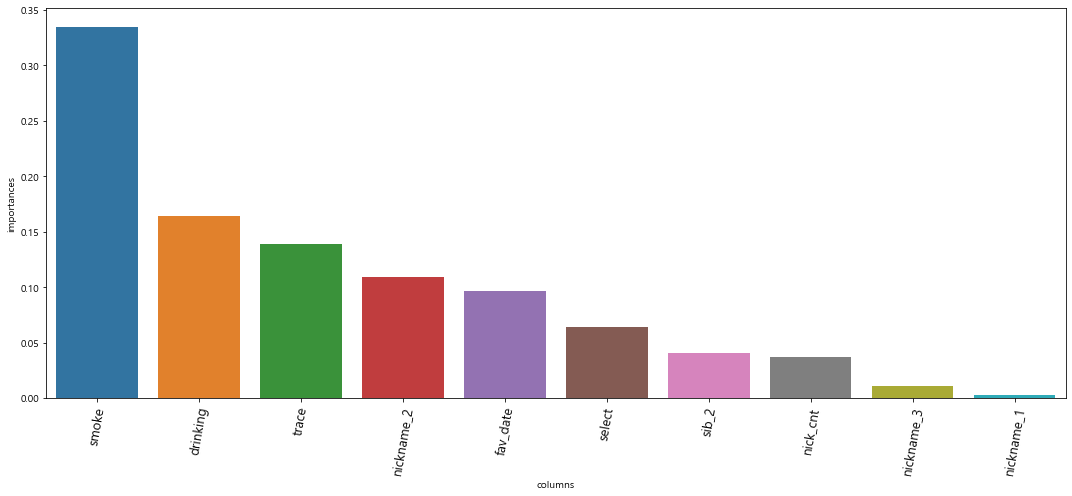

In [56]:
# 중요도 분석
feature_importance = rfc.feature_importances_
# plot
df_fi = pd.DataFrame({'columns':X.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] # importance가 0이상인 것만 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

## Gradient Boosting

In [57]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [10,100,300],
              'learning_rate': [0.5, 0.1, 0.01],
              'max_depth': [4,8,10],
              'min_samples_leaf': [50,100,300],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=k_fold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   35.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 810 out of 810 | elapsed:  2.1min finished


0.47043010752688175

In [58]:
GBC_best

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=10,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=50, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [59]:
predict_GBC = gsGBC.predict(X_test)
real = y_test.tolist()
comparision = pd.DataFrame({
    '실제기간': real,
    'GBC예측' : predict_GBC
})
comparision

,실제기간,GBC예측
0,3,3
1,2,0
2,1,1
3,2,2
4,3,2
...,...,...
88,2,3
89,0,2
90,1,0
91,1,1


## SVC

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
### SVC classifier
SVMC = SVC(probability=False)
svc_param_grid = {'kernel': ['rbf'],
                  'C': [1, 10, 100, 300]
                 }

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=k_fold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


0.42473118279569894

In [61]:
# SVC의 최적 파라미터
print(SVMC_best)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


## XG Boosting

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
XGBC = XGBClassifier()
xgb_param_grid = {'max_depth':[3,5,10],
                  'min_child_weight':[1,3,9],
                  'gamma': [ 0,0.05, 0.1],
                  'learning_rate':[0.1, 0.08, 0.05]}

gsXGBC = GridSearchCV(XGBC,param_grid = xgb_param_grid, cv=k_fold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsXGBC.fit(X_train,y_train)

XGBC_best = gsXGBC.best_estimator_

# Best score
gsXGBC.best_score_

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   16.1s
[Parallel(n_jobs=4)]: Done 405 out of 405 | elapsed:   36.2s finished


0.49193548387096775

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
XGBC = XGBClassifier()
xgb_param_grid = {'max_depth':[3,5,10],
                  'min_child_weight':[1,3,9],
                  'gamma': [ 0,0.05, 0.1],
                  'learning_rate':[0.1, 0.08, 0.05]}

gsXGBC = GridSearchCV(XGBC,param_grid = xgb_param_grid, cv=k_fold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsXGBC.fit(X_train,y_train)

XGBC_best = gsXGBC.best_estimator_

# Best score
gsXGBC.best_score_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   15.9s
[Parallel(n_jobs=4)]: Done 405 out of 405 | elapsed:   34.3s finished


0.49731182795698925

In [64]:
XGBC_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.05,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### Voting Classification

In [65]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), 
('svc', SVMC_best),('gbc',GBC_best), ('xgb', XGBC_best)], voting='hard', n_jobs=4)
votingC = votingC.fit(X_train, y_train)
votingC.predict
y_pred = votingC.predict(X_test)
votingC.score(X_test,y_test)

0.4838709677419355

In [66]:
print(classification_report(y_test, y_pred, target_names=['100일이하','100~300일','300~500일','500일이상']))

              precision    recall  f1-score   support

      100일이하       0.29      0.44      0.35        16
    100~300일       0.73      0.83      0.78        23
    300~500일       0.48      0.34      0.40        29
      500일이상       0.41      0.36      0.38        25

    accuracy                           0.48        93
   macro avg       0.48      0.49      0.48        93
weighted avg       0.49      0.48      0.48        93



# 최종 모델

### Logistic Regression